# Machine Learning Operations (MLOps)
## From "MLOps exercises.ipynb" February 26, 2025
 

ii. Second, one is in the notebook - ‘MLOps exercises.ipynb’. Do tasks 1 – 6 in this
notebook.

## Execise 1

In this exercise, do the following:
1. Create a function that preprocess new ames data in the same way as the original ames data was preprocessed in step 5 in the `MLOps.ipynb` notebook.
2. Create a function that takes as input a new ames dataset and a model. The function should pre-process the new data and evaluate the model on that new data using mean absolute error.
3. Test the function from 2. on the "NewAmesData1.csv" dataset and the best model from the `MLOps.ipynb` notebook.
4. Test the function from 2. on the "NewAmesData2.csv" dataset and the best model from the `MLOps.ipynb` notebook. Do you see any drift?
5. Do you see a data drift in "NewAmesData2.csv"? If so, for which variables?
6. Do you see a data drift in "NewAmesData4.csv"? If so, for which variables?
7. Create a function that retrain a model on the new data as well as the old training data
8. Retrain the `model_final` on the new data "NewAmesData1.csv" as well as the old training data, using the function from 5. Then test the new model on the old testset.
9. Split the "NewAmesData2.csv" dataset into a train and test set. Train  the best model from the `MLOps.ipynb` notebook on the training part and test it on the test part. Did you get a better model? Now combine your new training data with the original training data and retrain the model on that. Did that give you a better model?

# 1. Create a function that preprocess new ames data in the same way as the original ames data was preprocessed in step 5 in the `MLOps.ipynb` notebook.

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import  mean_absolute_error


In [11]:
ames = pd.read_csv("data\\AmesHousing.csv")
ames1 = pd.read_csv("data\\NewAmesData1.csv")
ames2 = pd.read_csv("data\\NewAmesData2.csv")
ames4 = pd.read_csv("data\\NewAmesData4.csv")


## 2. Create a function that takes as input a new ames dataset and a model. The function should pre-process the new data and evaluate the model on that new data using mean absolute error.


In [12]:
def preprocess(df):
#    df = df[df["Lot Area"] <= 75000]
    target = df[['SalePrice']]
    df = df[["Lot Area", "Overall Cond", "Year Built", "Gr Liv Area", "TotRms AbvGrd", "Mo Sold", "Yr Sold", "Bldg Type", "Neighborhood"]]
    df = df.join(pd.get_dummies(df["Bldg Type"], drop_first=True, dtype = "int", prefix="BType"))
    df = df.join(pd.get_dummies(df["Neighborhood"], drop_first=True, dtype = "int", prefix="Nbh"))
    features = df.drop(columns = ["Bldg Type", "Neighborhood"])

    return features, target

In [13]:
import pickle
def evaluate_model_performance(features, target, modelpath):
    with open(modelpath, "rb") as f:
        loaded_model = pickle.load(f)
    print("Model loaded successfully!")
    predictions = loaded_model.predict(features)
    print(f'MAE :{mean_absolute_error(target, predictions)}')

def evaluate_model_performance_with_model(features, target, model):
    predictions = model.predict(features)
    print(f'MAE :{mean_absolute_error(target, predictions)}')

## 3. and 4. Test the function from 2. on the "NewAmesData1.csv" and "NewAmesData2.csv".  the best model from the `MLOps.ipynb` notebook.  Do you see any drift?

Yes. The MAE is widely different.

In [14]:
model_path ='C:\\Users\\Hassan\\Desktop\\Data and Things\\code\\DAT_Notebooks_&_data\\lec_12\\mlruns\\0\\88dd1a7db9104fb0bacd6f529544a008\\artifacts\\model_rf_500\\model.pkl'

ames1_train_features, ames1_train_target = preprocess(ames1)
ames2_train_features, ames2_train_target= preprocess(ames2)

evaluate_model_performance(ames1_train_features, ames1_train_target, model_path)
evaluate_model_performance(ames2_train_features, ames2_train_target, model_path)





Model loaded successfully!
MAE :19318.837034992688
Model loaded successfully!
MAE :122803.13811326215


## 5. Do you see a data drift in "NewAmesData2.csv"? If so, for which variables?
Yes, there is data drift. It seems to have been artificially altered so SalesPrice differs between ames1 and ames2 as the remaining data is the same.
Based on the plotted distribution, the data is bascially the same apart from the SalesPrice, as seen on the last histogram.

In [15]:
def plot_distributions(train_data, new_data, column):
    plt.figure(figsize=(12, 6))
    sns.histplot(new_data[column], bins=30, color='red', label='New Data', kde=True)
    sns.histplot(train_data[column], bins=30, color='blue', label='Training Data', kde=True)
    plt.legend()
    plt.title(f'Distribution of {column}')
    plt.show()


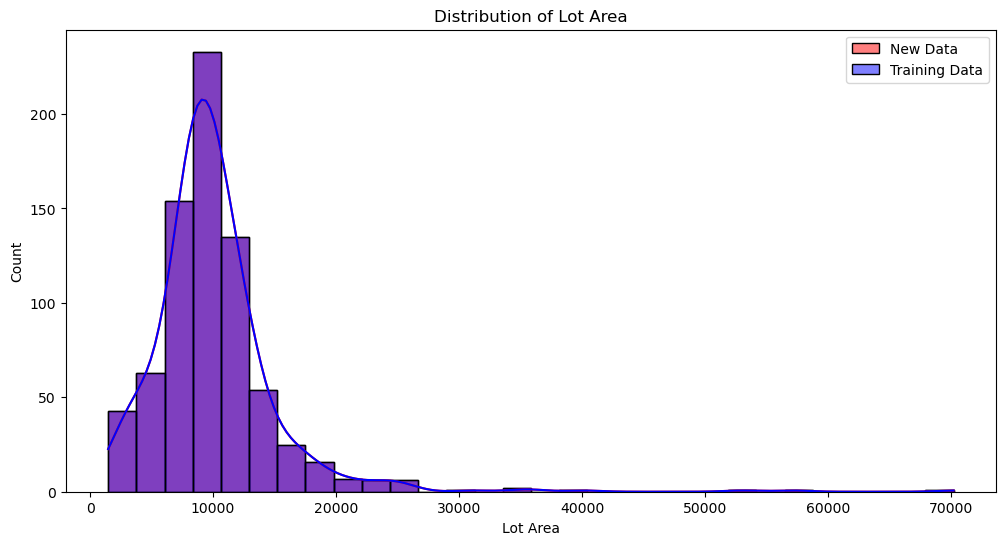

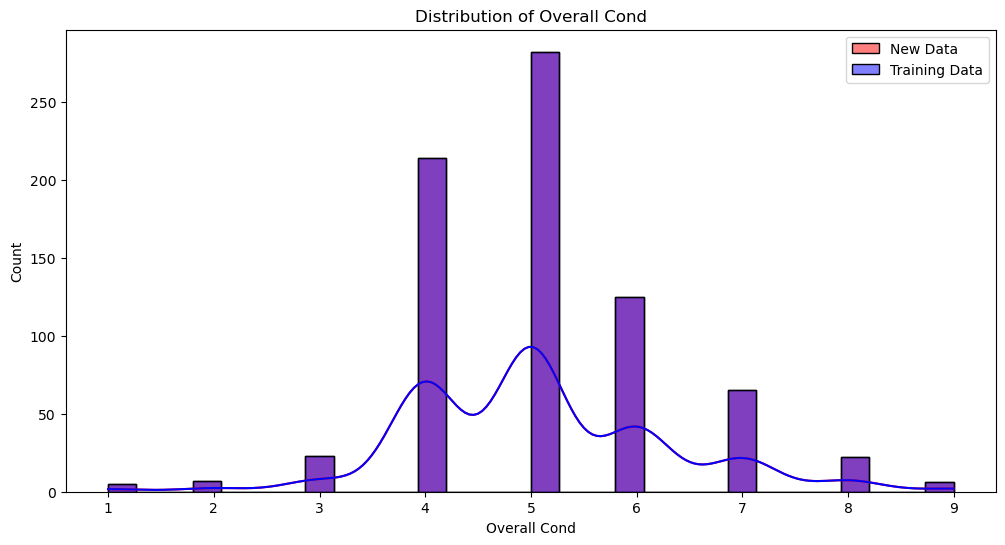

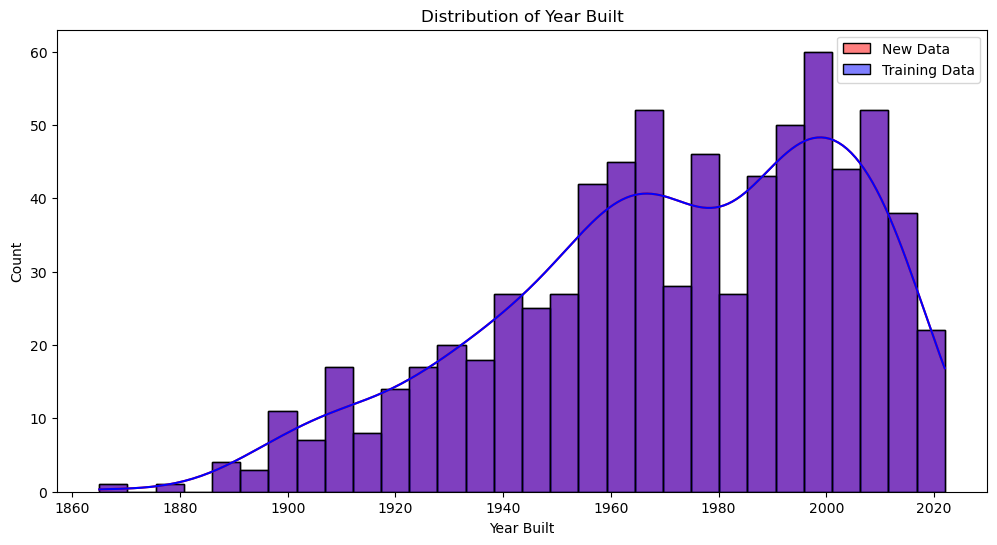

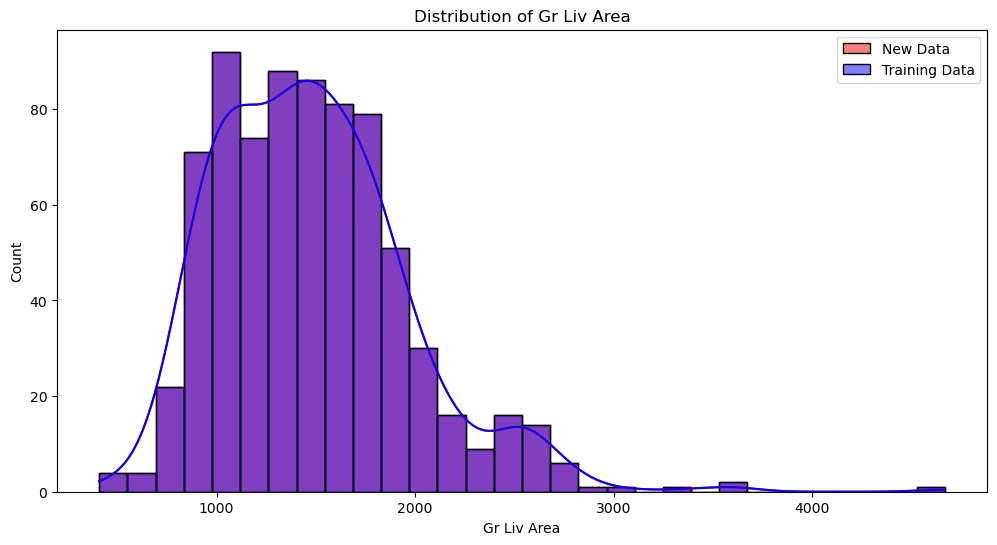

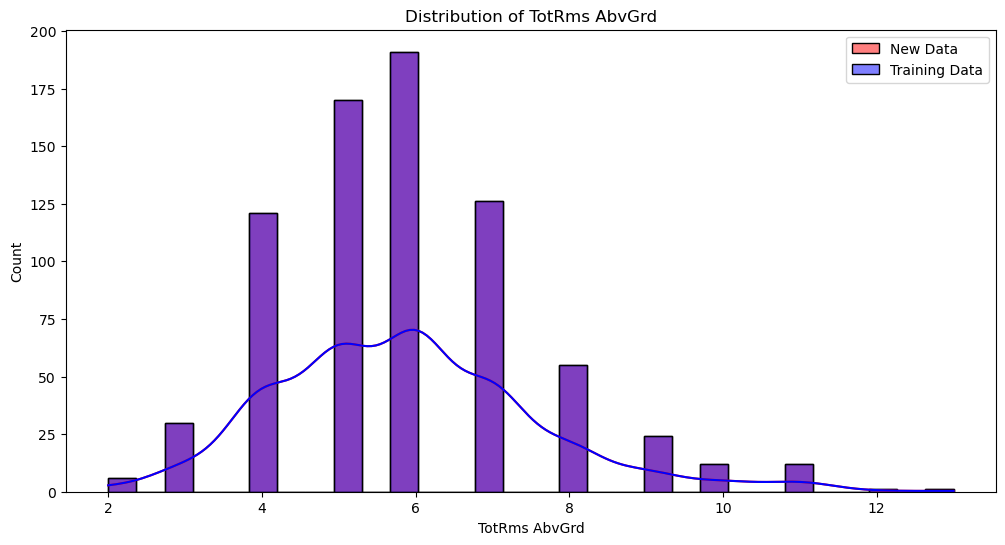

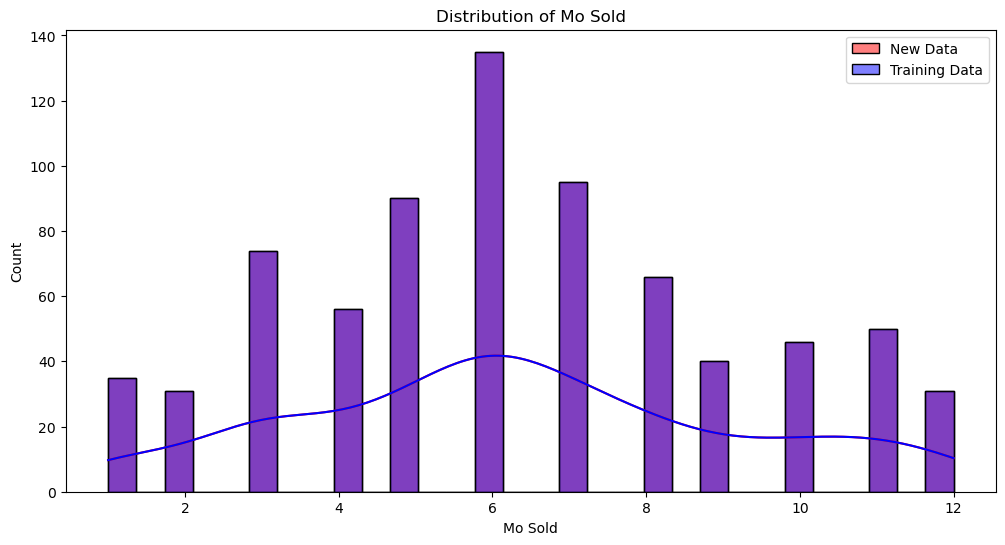

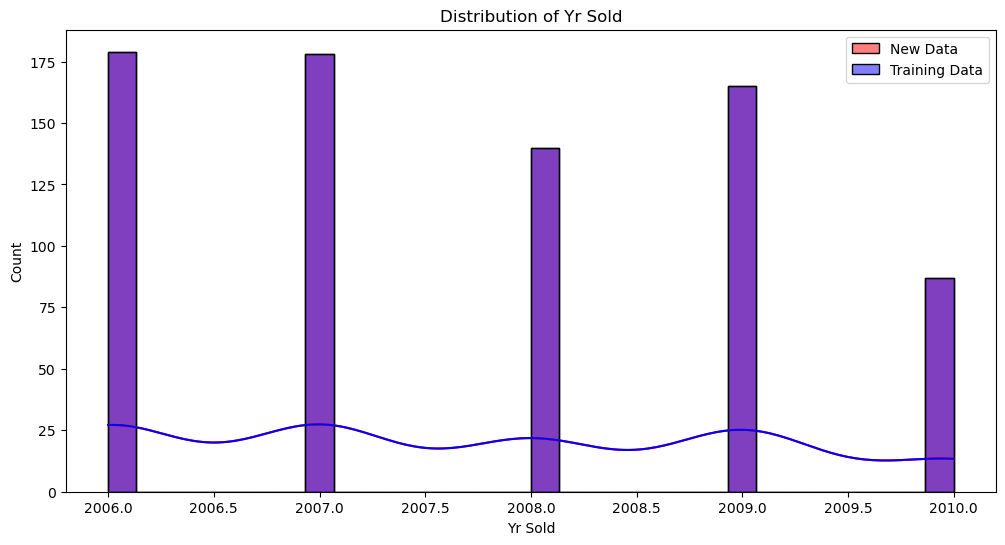

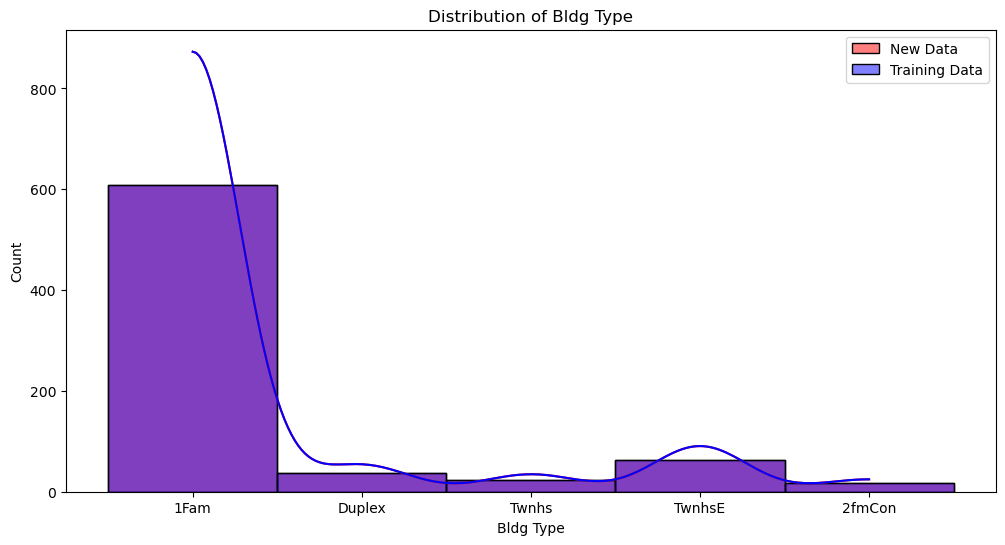

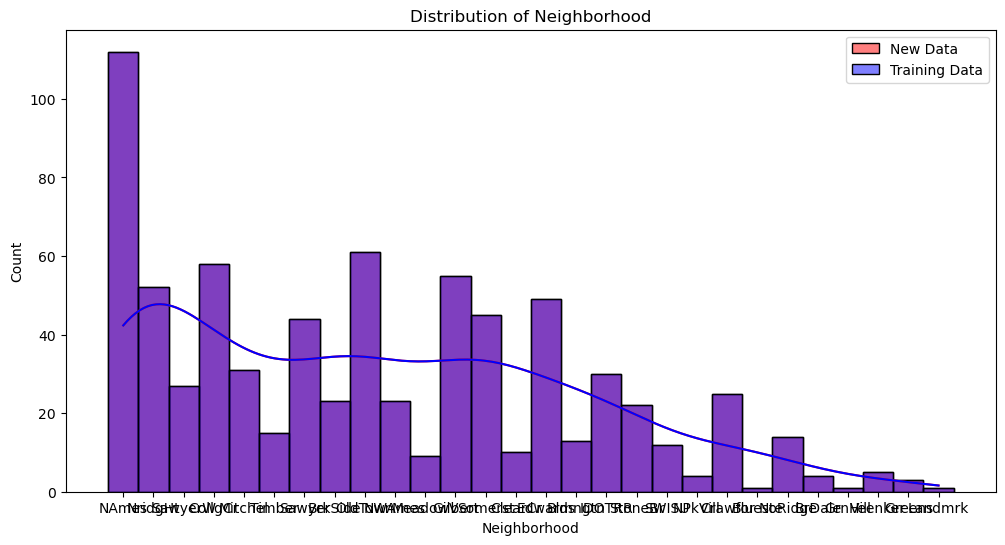

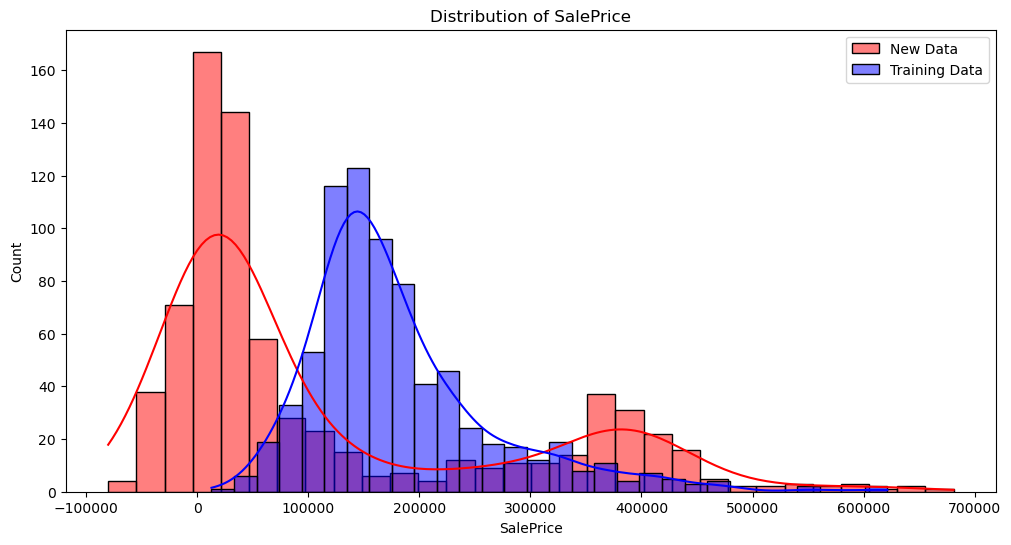

In [16]:
columns_to_compare = ames1.columns
for column in columns_to_compare:
    plot_distributions(ames1, ames2, column)

## 6. Do you see a data drift in "NewAmesData4.csv"? If so, for which variables?
Yes, there is datadrift.


Concept drift is not seen as much, as the distribution remains similar in most variables. 
Some Concept drift seen in: 
Lot area. - rise in lot area between Ames1 and Ames4.
Overall Condi - fall of over all condition.
Seems like there is a lot more data in ames4 and it seems to be newer too based on the Yr Sold

In [17]:
ames1_train_features, ames1_train_target = preprocess(ames1)
ames4_train_features, ames4_train_target= preprocess(ames4)

evaluate_model_performance(ames1_train_features, ames1_train_target, model_path)
evaluate_model_performance(ames4_train_features, ames4_train_target, model_path)


Model loaded successfully!
MAE :19318.837034992688
Model loaded successfully!
MAE :28417.507194462753


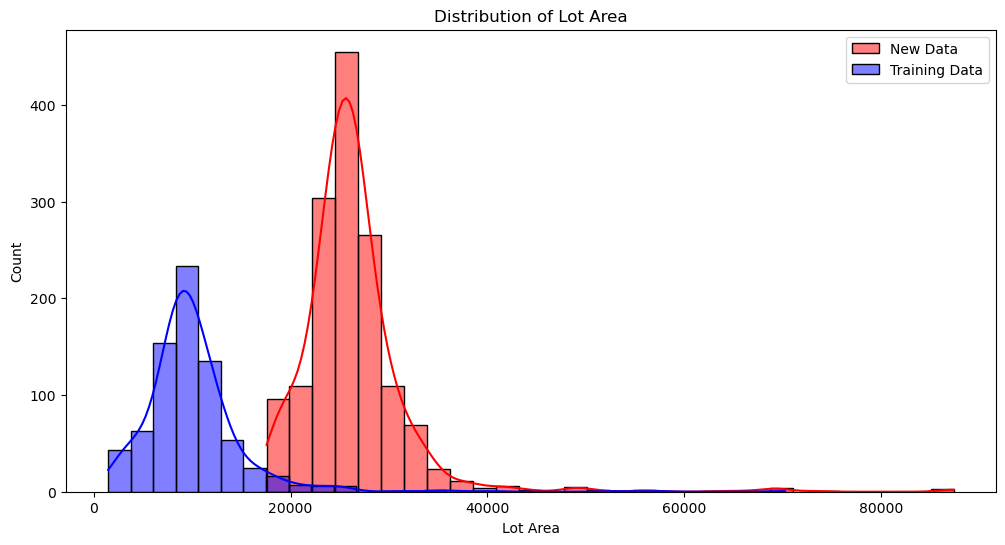

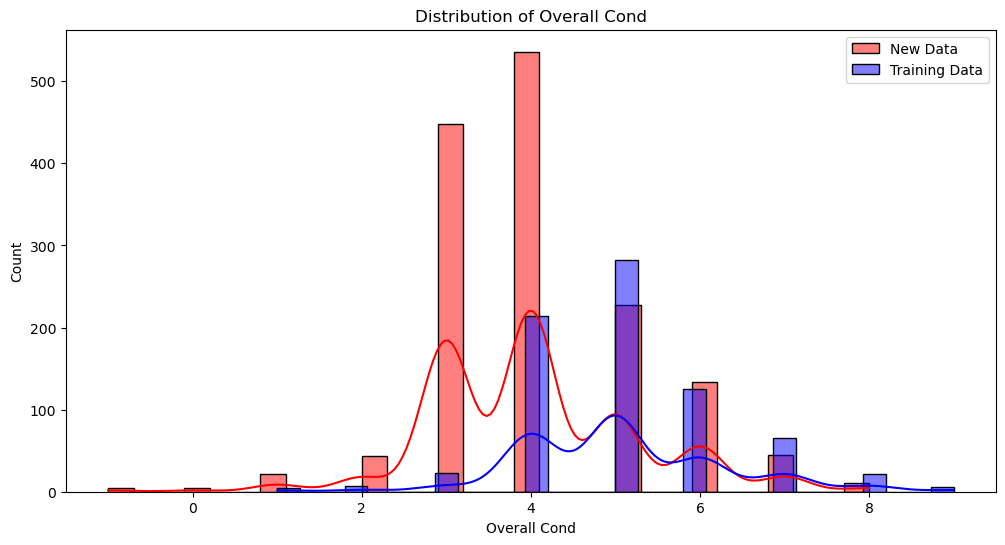

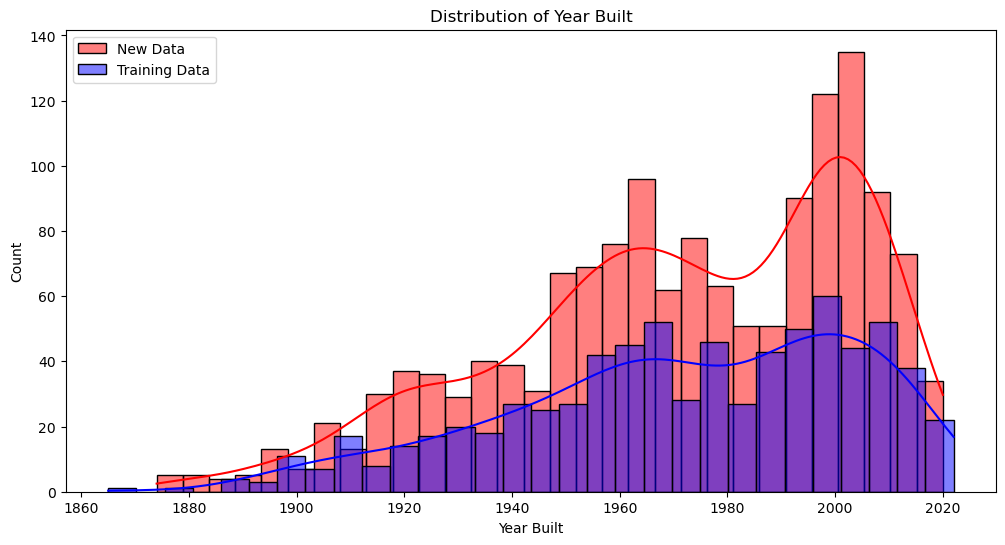

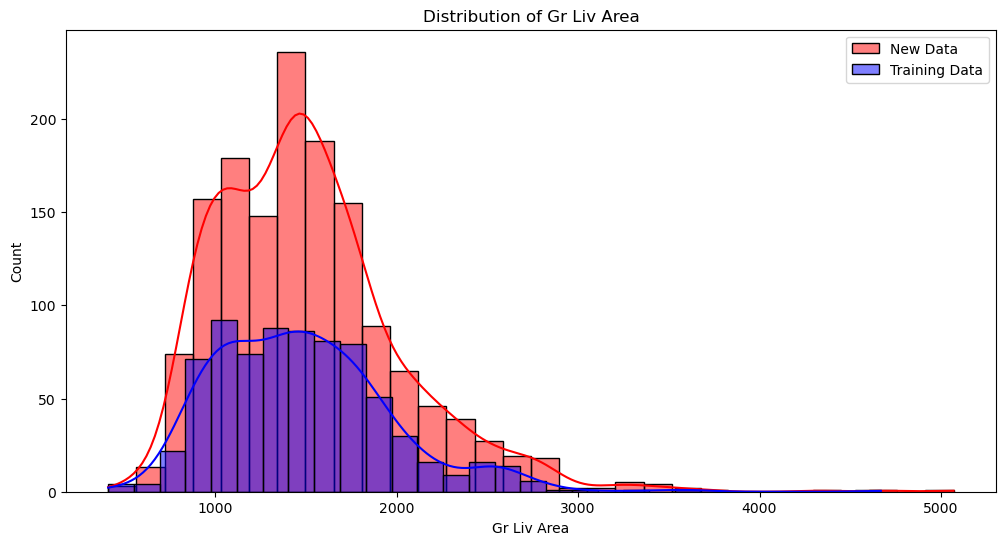

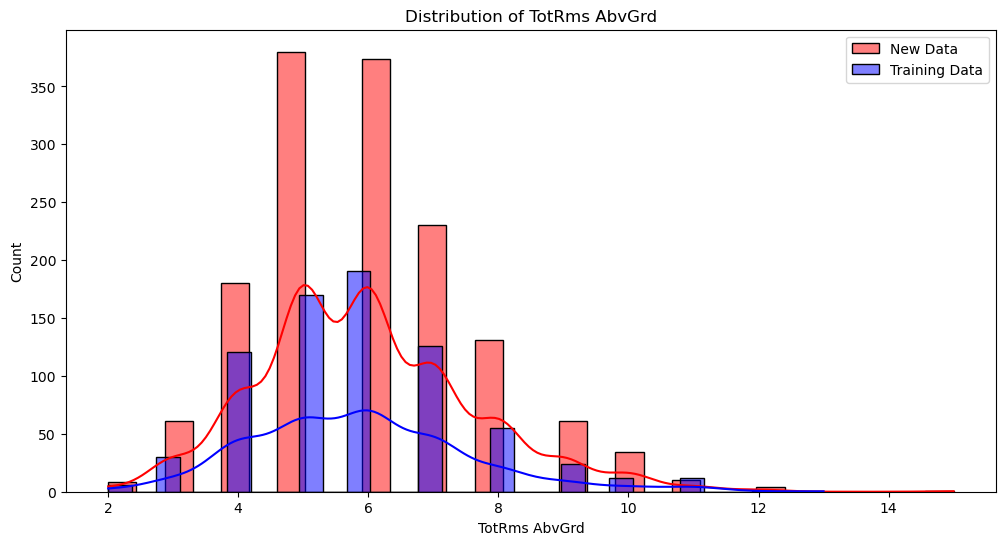

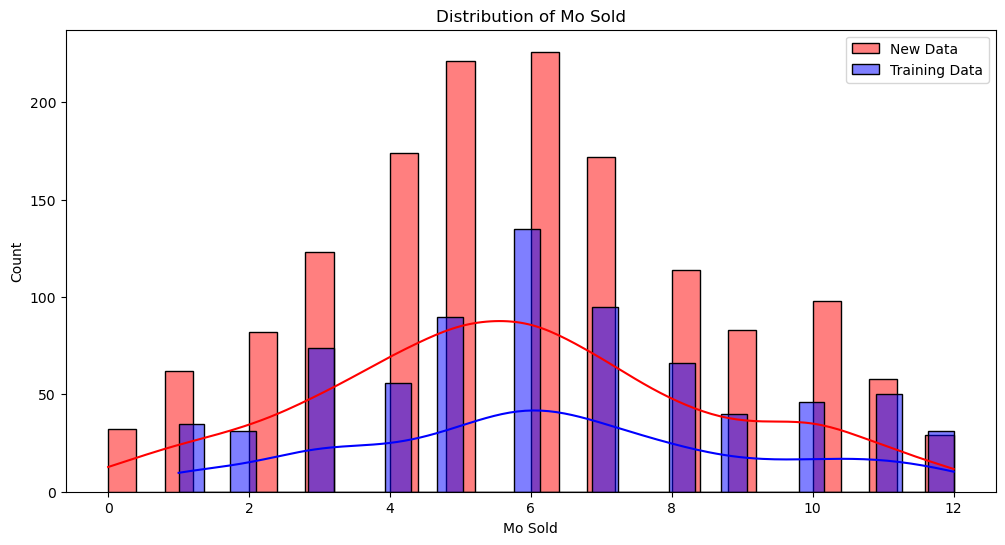

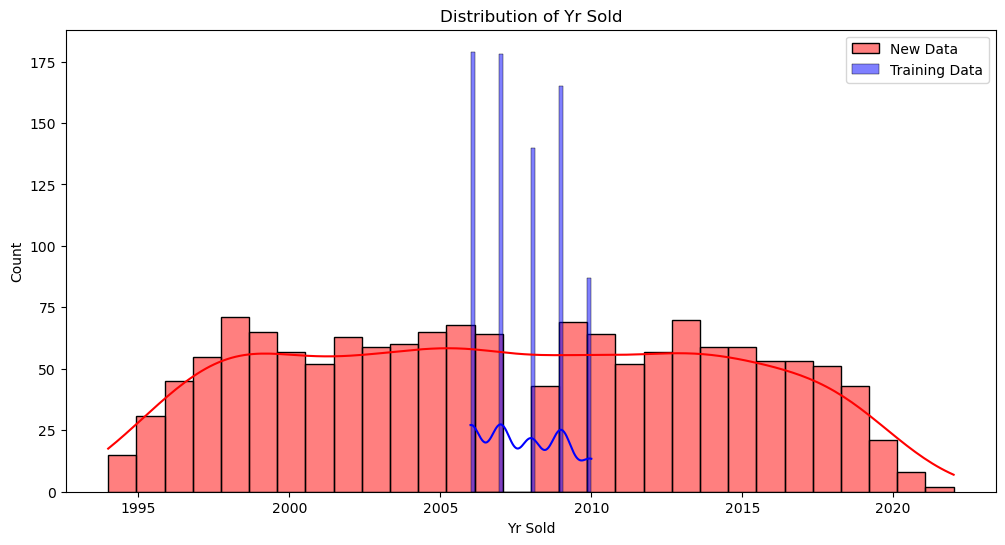

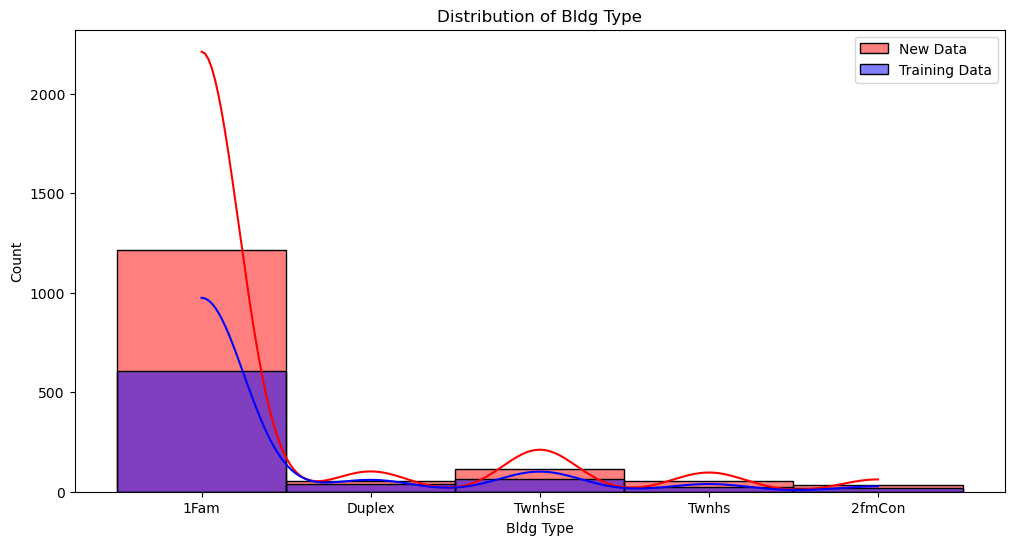

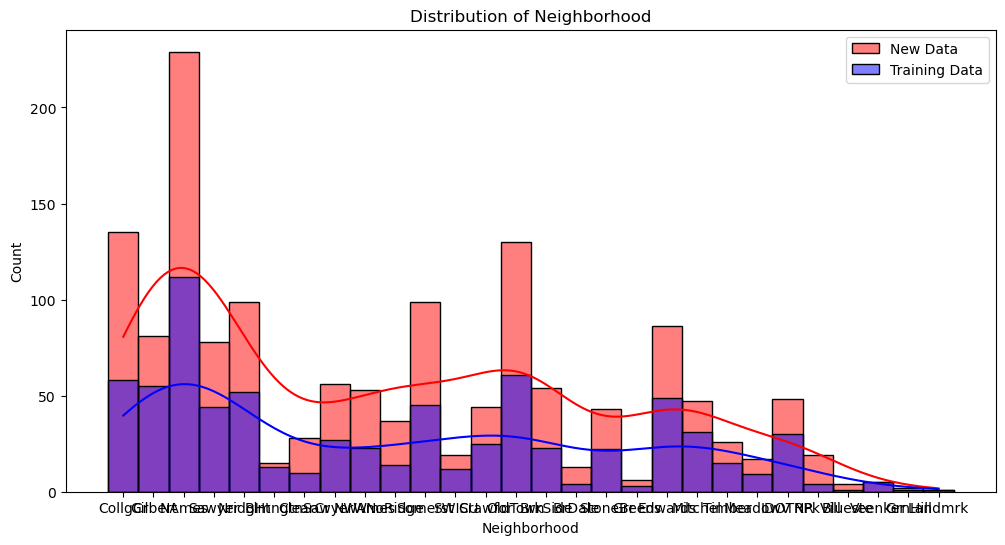

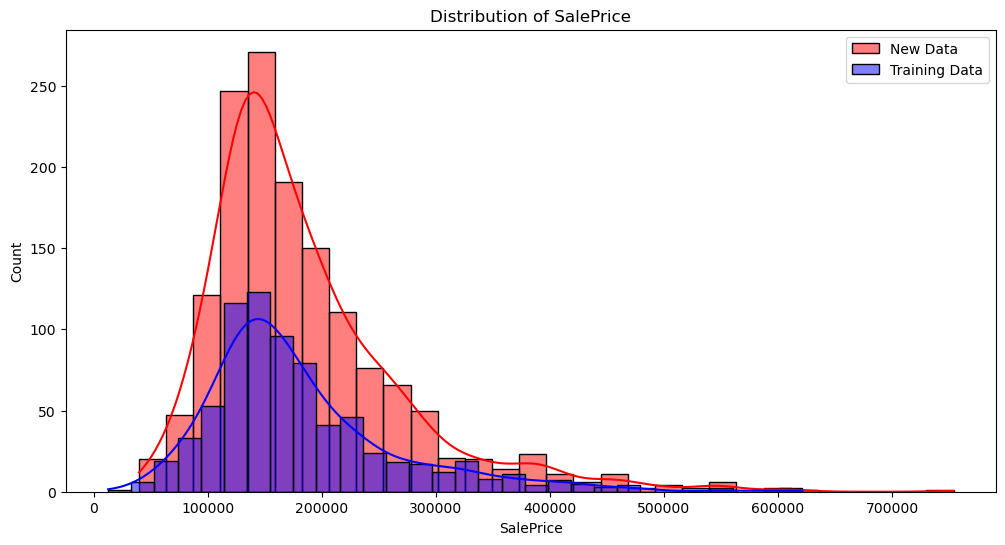

In [18]:
columns_to_compare = ames1.columns
for column in columns_to_compare:
    plot_distributions(ames1, ames4, column)

## 7. Create a function that retrain a model on the new data as well as the old training data


In [19]:
def retrain(modelpath, X, y):
    with open(modelpath, "rb") as f:
        loaded_model = pickle.load(f)
    print("Model loaded successfully!")
    loaded_model.fit(X, y)
    print("Model retrained successfully!")
    return loaded_model



In [20]:
# combining new and old data.
combined_data = pd.concat([ames, ames4], ignore_index=True)
X, y = preprocess(combined_data)

In [21]:
final_model = retrain(model_path, X,y)

Model loaded successfully!


c:\Users\Hassan\miniconda3\envs\oldPy\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model retrained successfully!


In [22]:
print('evaluation using model only trained on AmesHousing.csv:')

print(f'Ames1')
evaluate_model_performance(ames1_train_features, ames1_train_target, model_path)

print(f'Ames2')
evaluate_model_performance(ames2_train_features, ames2_train_target, model_path)

print(f'Ames4')
evaluate_model_performance(ames4_train_features, ames4_train_target, model_path)

print('\n')
print('evaluation using final_model trained on ames1 and ames4')
print(f'Ames1')
evaluate_model_performance_with_model(ames1_train_features, ames1_train_target, final_model)

print(f'Ames2')
evaluate_model_performance_with_model(ames2_train_features, ames2_train_target, final_model)

print(f'Ames4')
evaluate_model_performance_with_model(ames4_train_features, ames4_train_target, final_model)


evaluation using model only trained on AmesHousing.csv:
Ames1
Model loaded successfully!
MAE :19318.837034992688
Ames2
Model loaded successfully!
MAE :122803.13811326215
Ames4
Model loaded successfully!
MAE :28417.507194462753


evaluation using final_model trained on ames1 and ames4
Ames1
MAE :17292.302950291396
Ames2
MAE :122318.61802483525
Ames4
MAE :7359.046409930866


## 9. Split the "NewAmesData2.csv" dataset into a train and test set. Train  the best model from the `MLOps.ipynb` notebook on the training part and test it on the test part. Did you get a better model? Now combine your new training data with the original training data and retrain the model on that. Did that give you a better model?



In [23]:
X, y = preprocess(ames2)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state= 808)


In [24]:
final_final_model = retrain(model_path, X_train,y_train)

Model loaded successfully!


c:\Users\Hassan\miniconda3\envs\oldPy\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model retrained successfully!


In [25]:
print('\n')
print('evaluation using final_final_model trained on Ameshousing and retrained on ames2. Here evaluated on 20% test split from ames2')

evaluate_model_performance_with_model(X_test, y_test, final_final_model)




print('\n')
print('evaluation using final_final_model trained on amesHousing.csv and retrained on ames2. here evaluated on ames1, ames2 and ames4')
print(f'Ames1')
evaluate_model_performance_with_model(ames1_train_features, ames1_train_target, final_final_model)

print(f'Ames2')
evaluate_model_performance_with_model(ames2_train_features, ames2_train_target, final_final_model)

print(f'Ames4')
evaluate_model_performance_with_model(ames4_train_features, ames4_train_target, final_final_model)



evaluation using final_final_model trained on Ameshousing and retrained on ames2. Here evaluated on 20% test split from ames2
MAE :51310.606270799995


evaluation using final_final_model trained on amesHousing.csv and retrained on ames2. here evaluated on ames1, ames2 and ames4
Ames1
MAE :103299.23302622756
Ames2
MAE :24219.874041428
Ames4
MAE :60142.92322352079
